<div>
    <img src='../pics/banner.PNG'/>
</div>
<div>
    <img width="10%" height="10%" src='../pics/python-programming.png'/>
    <img src='../pics/miw.PNG'/>
</div>
<div>
    <em>Author: Jeroen Boogaard</em>
</div>

<h1>Samengestelde variabelen - Sets</h1>

**Een set is een <u>mutable</u> dataverzameling van <u>unieke</u> elementen.**

<div>
    <img width="25%" height="25%" src='../pics/pioneer.jpg'/>
</div>

<h3>Imports</h3>

In [1]:
!(pip list | grep geopandas) && (pip list | grep matplotlib-venn) && (pip list | grep contextily) || pip install -r ../pip/requirements.txt

geopandas                0.12.2
matplotlib-venn          0.11.7
contextily               1.3.0


In [2]:
import contextily as ctx
import geopandas as gpd
from matplotlib_venn import venn2, venn3
import matplotlib.pyplot as plt

<h3>Set variabelen aanmaken en afdrukken</h3>

In [3]:
spaceCrafts = set()
spaceCrafts = {"Pioneer", "Voyager"}
print(spaceCrafts)

{'Voyager', 'Pioneer'}


In [4]:
spaceCrafts.add("Voyager")

In [5]:
print(spaceCrafts)

{'Voyager', 'Pioneer'}


<h3>Exercise 1</h3>
<h4>Gegeven</h4>

In [18]:
def fiboSeqList(n):
    if n <= 1:
        return n
    else:
        return(fiboSeqList(n-1) + fiboSeqList(n-2))
    
fibonacciList = [fiboSeqList(i) for i in range(0,20)]    
print(fibonacciList)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181]


<h4>Gevraagd</h4>
<p>Maak gebruik van <u>cast</u> om variabele <i>fibonacciList</i> te ontdubbelen</p>

<h4>Oplossing</h4>

In [117]:
# Oplossing
def fiboSeqList(n):
    if n <= 1:
        return n
    else:
        return(fiboSeqList(n-1) + fiboSeqList(n-2))
    
fibonacciList = [fiboSeqList(i) for i in range(0,20)]    
print(fibonacciList)

fibonacciSet = set(fibonacciList)
print(list(fibonacciSet))

please inter a number:  15


610
[0, 1, 2, 3, 5, 8, 13, 144, 21, 2584, 34, 55, 1597, 4181, 89, 987, 610, 233, 377]


<h3>Operaties</h3>

In [8]:
nordics = {"Denmark", "Finland", "Iceland", "Norway"}
baltics = {"Estonia", "Latvia", "Lithuania"}
eu = {"Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czechia", "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary", "Ireland", "Italy", "Latvia", "Lithuania", "Luxembourg", "Malta", "Netherlands", "Poland", "Portugal", "Romania", "Slovakia", "Slovenia", "Spain", "Sweden"}

<h3>Exercise 2</h3>
<h4>Gegeven</h4>

In [11]:
benelux = {"Belgium", "Netherlands", "Luxembourg"}
benStr = ""
benList = list(benelux)
print(benList)

['Luxembourg', 'Netherlands', 'Belgium']


<h4>Gevraagd</h4>
<ul>
<li>Maak een String benStr met als <u>value</u> "BeNeLux" die is opgebouwd uit de letters van corresponderende items uit de set <i>benelux</i> zonder de set variabele zelf aan te passen</li>
<li>Maak een List benList met als <u>value</u> ["BE", "NL" "LU"] die is opgebouwd uit de letters van corresponderende items uit de set <i>benelux</i> zonder de set variabele zelf aan te passen</li>
</ul>

<h4>Oplossing</h4>

In [161]:
# Maak een String benStr met als value "BeNeLux"
def convert_list_to_string(benelux):
    text = f"{benelux[0][:2]}{benelux[1][:2]}{benelux[2][:3]}"
    
    return text

In [162]:
# Maak een String benStr met als value "BeNeLux"
benelux = {"Belgium", "Netherlands", "Luxembourg"}
newList_benelux = [ benList[2], benList[0], benList[1] ]
print(convert_list_to_string( newList_benelux ))

BeNeLux


In [19]:
# Maak een List benList met als value ["BE", "NL" "LU"]
def get_summarize(country):
    if country == 'Netherlands':
        return 'NL'
    return country[0:2].upper()
print([get_summarize(item) for item in list(benelux)[::-1]])

['BE', 'NL', 'LU']
{'Luxembourg', 'Netherlands', 'Belgium'}


<h3>Visualisatie</h3>

**We gebruiken geopandas voor het visualiseren van een landkaart en filteren op de 2-letterige landcode**

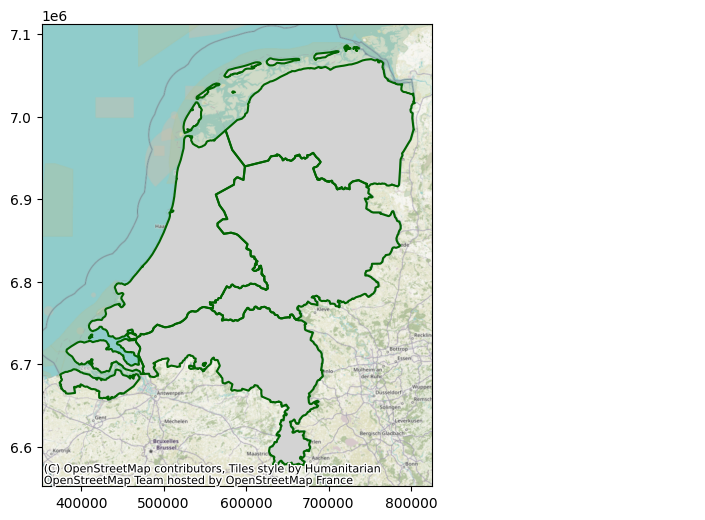

In [11]:
# Geografische data inlezen
data_dir = "../geo/ref-nuts-2021-01m/"
euPath = data_dir + "NUTS_RG_01M_2021_3035_LEVL_1.json"
gdf = gpd.read_file(euPath)

# Coordinatensysteem
gdf.crs = "EPSG:3035"

# Filteren landen m.b.v. codes uit benList
gdfBen = gdf[(gdf.CNTR_CODE == benList[0]) | (gdf.CNTR_CODE == benList[1]) | (gdf.CNTR_CODE == benList[2])] if len(benList)==3 else gdf[(gdf.CNTR_CODE == "NL")]

# Conversie Coordinaten
gdfCrsBen = gdfBen.to_crs("EPSG:3857")

# Plot
ax = gdfCrsBen.plot(figsize=(8,6), color="lightgray")

# Grenzen Benelux landen
gdfCrsBen.boundary.plot(color="darkgreen", ax=ax)

# Achtergrondkaart
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.HOT)

**Gebruik <i>union</i> om verzamelingen verenigen**

In [12]:
subUnion = benelux.union(nordics).union(baltics)
print(subUnion)

{'Iceland', 'Netherlands', 'Luxembourg', 'Latvia', 'Finland', 'Belgium', 'Denmark', 'Lithuania', 'Norway', 'Estonia'}


<p>De Sets benelux, nordics en baltics zijn allen een eigen <strong>subset</strong> van eu</p>

<p>Niet alle landen uit <i>subUnion</i> zijn lid van de Europese Unie</p>

In [36]:
baltics.issubset(eu) and benelux.issubset(eu) and nordics.issubset(eu)

False

**Gebruik de methode <i>intersection</i> voor de doorsnede van twee Sets**

In [14]:
eu.intersection(nordics)

{'Denmark', 'Finland'}

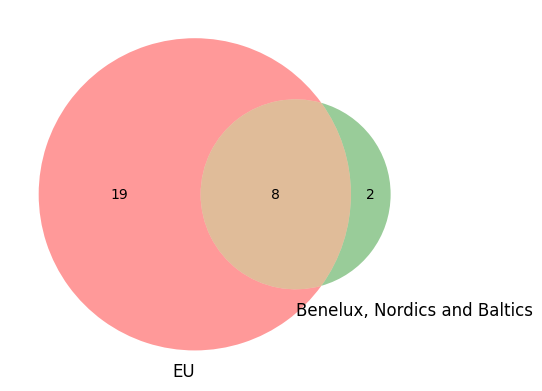

In [15]:
venn2([eu, subUnion], ('EU', 'Benelux, Nordics and Baltics'))
plt.show()

<h3>Exercise 3</h3>
<h4>Gegeven</h4>
<p>EU lidstaten die de euro (nog) niet hebben ingevoerd</p>

In [16]:
nonEuro = ['Bulgaria', 'Czech Republic', 'Denmark', 'Hungary', 'Poland', 'Romania', 'Sweden']

<h4>Gevraagd</h4>
<p>Gebruik de methode <u>difference</u> om EU landen weer te geven die <u>wel</u> lid zijn van de Eurozone</p>

<h4>Oplossing</h4>

In [128]:
# Oplossing
Eurozone = nordics.union(baltics).union(benelux).union(nonEuro)
print(Eurozone)
eu.difference(nonEuro)


{'Iceland', 'Netherlands', 'Luxembourg', 'Czech Republic', 'Sweden', 'Bulgaria', 'Latvia', 'Finland', 'Denmark', 'Belgium', 'Lithuania', 'Norway', 'Hungary', 'Estonia', 'Poland', 'Romania'}


{'Austria',
 'Belgium',
 'Croatia',
 'Cyprus',
 'Czechia',
 'Estonia',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Ireland',
 'Italy',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Netherlands',
 'Portugal',
 'Slovakia',
 'Slovenia',
 'Spain'}